В данном файле собраны данные по измерению времени жизни. Папка с данными '/Users/artemgolovizin/Downloads/2015_01_30/JSONS'.
Использовались только данные измерения при разных мощностях и усреднялось значение для каждой точки.

В конце добавлена часть с прорисовкой импульной схемы (красиво для статьи)

## Execute cell below and go to "You can run from here"

In [1]:
%pylab inline
import pickle
import sys
import os
par_dir = os.path.split(os.getcwd())[0]
if par_dir not in sys.path:
    sys.path.append(par_dir)
import inspect
import pickle
import imp
import re
import json
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.chdir(r'/Users/artemgolovizin/Downloads/2015_01_30/JSONS')

In [3]:
dr = working_directory = os.path.join(os.getcwd(),'JSONS')

In [ ]:
data = dict()
for fil in os.listdir():
    with open(fil, 'r') as infile:
           data[fil] = array(json.load(infile))

In [ ]:
for key,vval in data.items():
    data[key] = delete(vval,-1,0)
    data[key][:,1] /= max(data[key][:,1])

In [ ]:
for key, val in data.items():
    plot(val[:,0], val[:,1],'*')

In [ ]:
tot_data = dict()
for key, value in data.items():
    for elem in value:
        if elem[0] in tot_data:
            tot_data[elem[0]] = append(tot_data[elem[0]],[elem[1]])
        else:
            tot_data[elem[0]] = array([elem[1]])

In [ ]:
m_s = dict()
# for key in tot_data():
m_s['x'] = abs(array(list(tot_data.keys())))
m_s['y'] = array([mean(x) for x in tot_data.values()])
m_s['yerr'] = array([std(x) for x in tot_data.values()])

### You can run from here

In [2]:
# to simply load data for modifying plot run this
m_s = {'x': array([  80.,  350.,  300.,   90.,  250.,  200.,  390.,  100.,  150.,   70.]),
 'y': array([ 0.29783573,  0.94337558,  0.92780992,  0.36109954,  0.85704147,
         0.76971866,  0.97863665,  0.40214764,  0.63503326,  0.22274841]),
 'yerr': array([ 0.05314282,  0.08065586,  0.04035642,  0.06536226,  0.05461055,
         0.06724513,  0.0249964 ,  0.06623517,  0.06555113,  0.03975013])}

In [3]:
m_s['x'] -= 40

In [4]:
def fit_func(t,N,t0,tau,background):
    return N*(1-exp(-(t-t0)/tau)) + background 
popt, pcov = curve_fit(fit_func, m_s['x'], m_s['y'], p0=(1,0, 100,0))
# popt, pcov = curve_fit(fit_func, m_s['x'], m_s['y'],sigma=m_s['yerr'], p0=(1,0, 100,0))

(0, 1.2000000000000002)

/Users/artemgolovizin/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


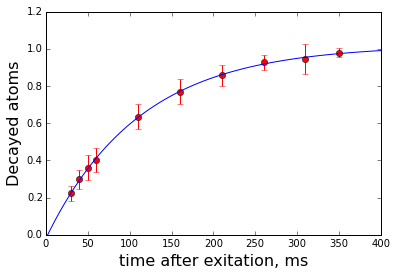

In [5]:
errorbar(fmt='ro',**m_s)
xx = linspace(0,400,100)
plot(xx,fit_func(xx,*popt))
ylabel('Decayed atoms',fontsize=16)
xlabel('time after exitation, ms',fontsize=16)
ylim(bottom=0)
#savefig('clock_lifetime.png')

## Clock level lifetime equals to 112 ms

In [6]:
perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)

[   0.88243382   18.19853682  111.86842225    0.13705246]
[  1.19828989e+05   1.51910317e+07   4.34914152e+00   1.19828993e+05]


/Users/artemgolovizin/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


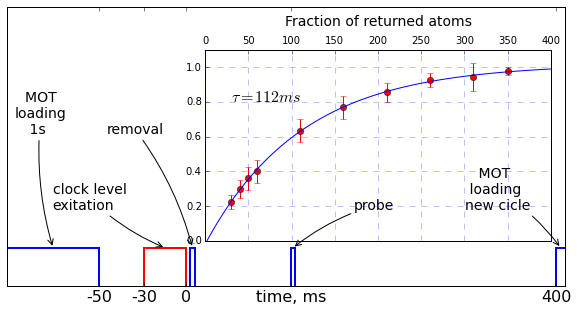

In [8]:
fig, ax = subplots(figsize=(10,5))
y_val = 0.15
t_mot1 = (-200,-100)
t_clock = (-50,-5)
t_remove = (0,5)
t_probe = (110,115)
t_mot2 = (400,410)
ax.plot(t_mot1,(y_val,y_val),'b',lw=2)
ax.plot([t_mot1[1]]*2,(y_val,0),'b',lw=2)
ax.plot(t_clock,(y_val,y_val),'r',lw=2)
ax.plot([t_clock[0]]*2,(y_val,0),'r',lw=2)
ax.plot([t_clock[1]]*2,(y_val,0),'r',lw=2)
ax.plot(t_remove,(y_val,y_val),'b',lw=2)
ax.plot([t_remove[0]]*2,(y_val,0),'b',lw=2)
ax.plot([t_remove[1]]*2,(y_val,0),'b',lw=2)
ax.plot(t_probe,(y_val,y_val),'b',lw=2)
ax.plot([t_probe[0]]*2,(y_val,0),'b',lw=2)
ax.plot([t_probe[1]]*2,(y_val,0),'b',lw=2)
ax.plot(t_mot2,(y_val,y_val),'b',lw=2)
ax.plot([t_mot2[0]]*2,(y_val,0),'b',lw=2)

ax.set_xticks([t_mot1[1], t_clock[0],t_clock[1],t_probe[0], t_mot2[0]])
ax.set_xticklabels([-50, -30, 0, 'time, ms', 400], fontsize=16)
font_size = 14
ax.annotate('  MOT\nloading\n   1s', xy=(sum(t_mot1)/2, y_val), xycoords='data',
                xytext=(-190, 0.6), size=font_size, textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=0.1"),
                )
ax.annotate('clock level\nexitation', xy=(sum(t_clock)/2, y_val), xycoords='data',
                xytext=(-150, 0.3), size=font_size, textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=0.1"),
                )
ax.annotate('removal', xy=(sum(t_remove)/2, y_val), xycoords='data',
                xytext=(-90, 0.6), size=font_size, textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=-0.1"),
                )
ax.annotate('probe', xy=(sum(t_probe)/2, y_val), xycoords='data',
                xytext=(180, 0.3), size=font_size, textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=0.1"),
                )
ax.annotate('   MOT\n loading\nnew cicle', xy=(sum(t_mot2)/2, y_val), xycoords='data',
                xytext=(300, 0.3), size=font_size, textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=-0.1"),
                )

inset_ax = fig.add_axes([0.40, 0.25, 0.48, 0.53],) 
inset_ax.errorbar(fmt='ro',**m_s)
xx = linspace(0,400,100)
inset_ax.plot(xx,fit_func(xx,*popt))
inset_ax.set_ylim(0,1.1)
inset_ax.yaxis.tick_left()
inset_ax.xaxis.tick_top()
inset_ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
inset_ax.patch.set_visible(False)
inset_ax.set_title('Fraction of returned atoms',y=1.1,size=14)

inset_ax.text(30,0.8,r'$\tau=112ms$',size=16)

ax.set_ylim(0,1.1)
ax.set_xlim(right=410)
ax.set_ylabel('Atoms returned')
#ax.set_xlabel('time')
ax.yaxis.set_label_position("right")
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#fig.savefig('clock_lifetime.eps')